
<h1 style="text-align:center; font-family:Times New Roman">CP321 - Sports Car Project</h1>

<h2 style="text-align:center; font-family:Times New Roman; font-size:1.5em">Nishant Tewari & Dharmik Patel</h2>

<h2 style="text-align:center; font-family:Times New Roman; font-size:1.5em">190684430 & 180343800</h2>

<h1 style="text-align:left; font-family:Times New Roman">Introduction</h1>

<span style="font-family: Times New Roman;">The dataset used for this project can be retrieved from [here](https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset?resource=download)</span>

<span style="font-family: Times New Roman;">The data contains information on various Sports cars across multiple car manufactures such as 
- Make & Model of the car 
- Year of Production 
- Engine Size (L)
- Horsepower
- Torque (lb-ft)
- 0 - 60 MPH time(seconds)
- Price (USD)
</span> 

<span style="font-family: Times New Roman;">The dataset has 38 unique car manufactures ranging from brands we commonly see on the roads all the way to more exotic rides that are not common at all.</span>
</br>
<span style="font-family: Times New Roman;">The lowest price car on the dataset is the 2021 Chevrolet Camaro priced at $25,000 USD</span>
</br>
<span style="font-family: Times New Roman;">The highest price car on the dataset is the 2022 Bugatti Chiron Super Sport 300+ priced at $5.2 million USD</span>



In [69]:
import pandas as pd

df = pd.read_csv('data/Sport_car_price.csv')

# Find the number of unique car makes
num_car_makes = df['Car Make'].nunique()

# Display the result
print("Number of unique car makes:", num_car_makes)

Number of unique car makes: 38


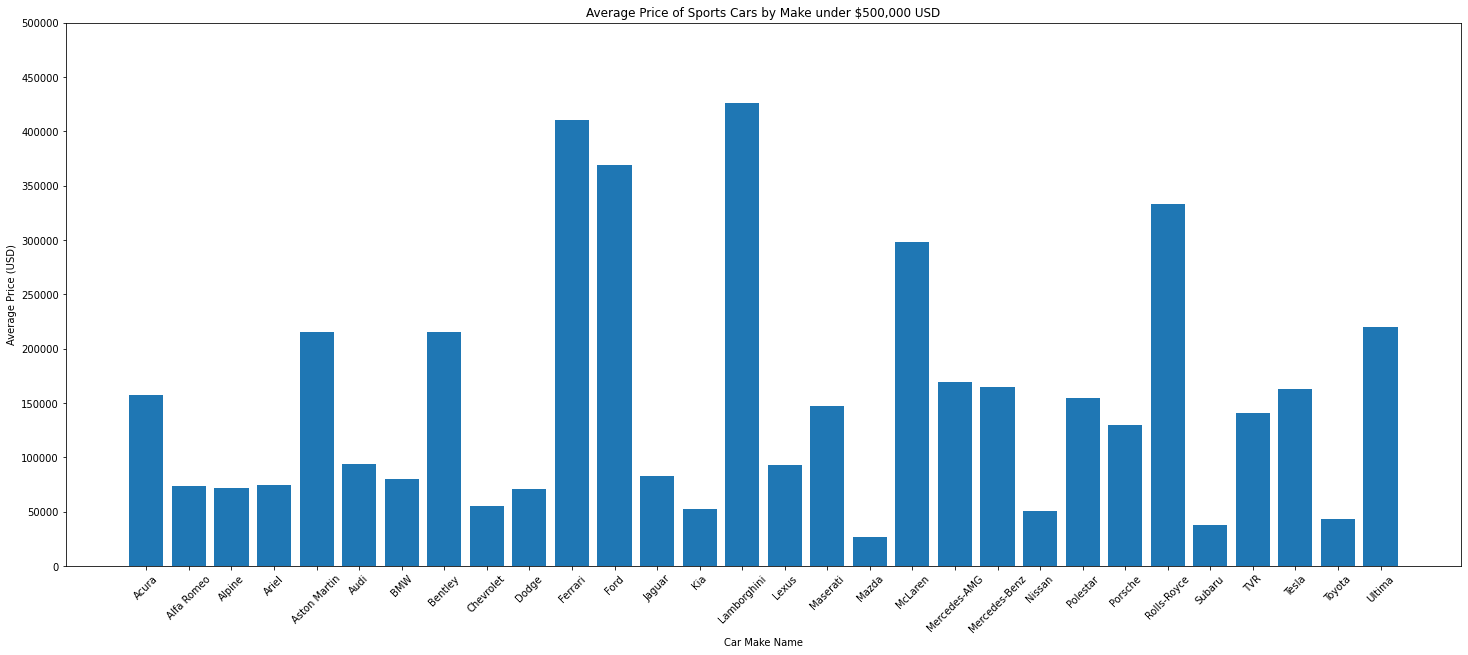

In [66]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/Sport_car_price.csv')

# calculating the average price of the cars made by each brand 
avg_prices = df.groupby('Car Make')['Price (in USD)'].mean().reset_index()

# set the overall size of the graph 
plt.figure(figsize=(25, 10))

# filtering the average prices to show car brands that average below $500,000
avg_prices = avg_prices[avg_prices['Price (in USD)'] <= 500000]

# Plot a scatter plot of the average price for each make of car
plt.bar(avg_prices['Car Make'], avg_prices['Price (in USD)'])

# Set the plot title and axis labels
plt.title('Average Price of Sports Cars by Make under $500,000 USD')
plt.xlabel('Car Make Name')
plt.ylabel('Average Price (USD)')

# Rotate the names on the x-axis to make it easier to read 
plt.xticks(rotation=45)

# Set the y-axis labels with an increment of $50,000 between (0 - $500k)
plt.ylim(0, 500000)
plt.yticks(np.arange(0, 500001, 50000))

# plot the graph 
plt.show()